In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot(dataset):
    def get_correlations(g, num_qubits):
        r_list = [0.0, 0.5, 1.0]
        correlations = np.zeros((2, 3, 6))
        for i, r in enumerate(r_list):
            PATH = f'../../results_correlation/{dataset}/r={r}/num_qubits={num_qubits}/'
            if g:
                MI_list = np.load(PATH + 'MI_g_mu_list.npy')
                Tau_list = np.load(PATH + 'Tau_g_mu_list.npy')
                p_list = np.load(PATH + 'p_value_g_mu_list.npy')
                Tau_list[:3] = - Tau_list[:3]
            else:
                MI_list = np.load(PATH + 'MI_test_mu_list.npy')
                Tau_list = np.load(PATH + 'Tau_test_mu_list.npy')
                p_list = np.load(PATH + 'p_value_test_mu_list.npy')
            Tau_list = (Tau_list + 1) / 2
            correlations[0][i] = MI_list
            correlations[1][i] = Tau_list
        return correlations

    def plot_correlations(g, num_qubits):
        # Fixed r value
        r_index = 0  # This corresponds to r = 0.0

        # Complexity measures with newline characters for multi-line labels
        complexity_measures = [
            "margin\n(Q1)", 
            "margin\n(median)", 
            "margin\n(mean)", 
            "num.\nparams", 
            "num. eff.\nparams (0.1)", 
            "num. eff.\nparams (0.01)"
        ]

        # Get correlations data
        correlations = get_correlations(g, num_qubits)
        
        # Indices of the complexity measures
        l_list = [0, 1, 2, 3, 4, 5]

        # Bar width
        bar_width = 0.4
        index = np.arange(len(l_list))

        # Plot
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Increase font size
        plt.rcParams.update({'font.size': 14})

        # Grouped bar plots for Mutual Information and Kendall's Tau
        bars1 = ax.bar(index - bar_width/2, correlations[0, r_index, l_list], bar_width, label='Mutual Information', color='gray')
        bars2 = ax.bar(index + bar_width/2, correlations[1, r_index, l_list], bar_width, label="Kendall's Tau", color='white', edgecolor='black', hatch='//')
        
        # Set x-axis labels
        #ax.set_xlabel('Complexity Measures')
        ax.set_xticks(index)
        ax.set_xticklabels(complexity_measures)  # Multi-line labels

        # Set y-axis labels
        ax.set_ylabel('Correlation Values')

        # Add a single legend
        ax.legend(loc='upper right')

        # Tight layout to avoid clipping of tick-labels
        plt.tight_layout()

        # Save and show the plot
        plt.savefig(f'{dataset}_correlations_plot.pdf')
        plt.show()

    # Example usage:
    # plot_correlations(g, num_qubits)
    plot_correlations(True, 8)

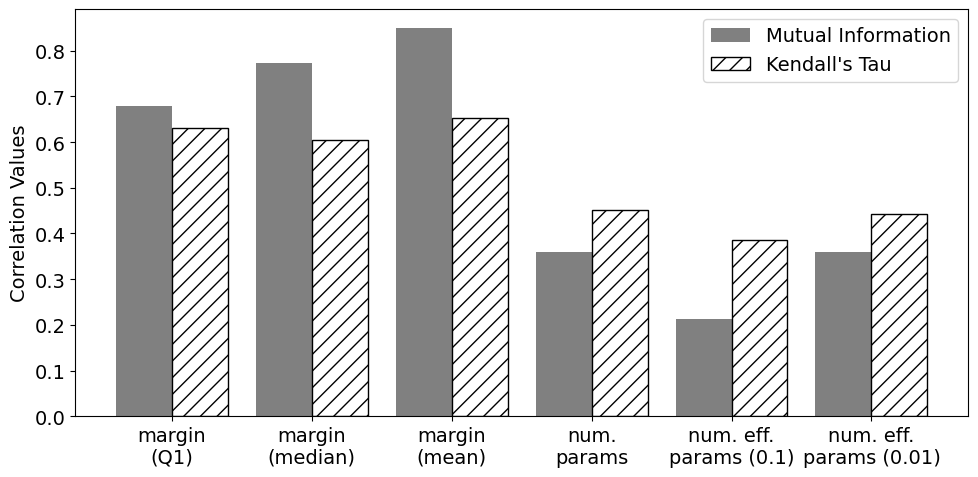

In [9]:
dataset = "Cluster"
plot(dataset)

In [ ]:
dataset = "XXZ"
plot(dataset)

In [ ]:
dataset = "TFIM"
plot(dataset)